<a href="https://colab.research.google.com/github/valemcp/Big-Data-Ordinario/blob/main/BD_ORDINARIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

#1. CARGA Y SEGMENTACION DE LA INFORMACIÓN
#carga de datasets
df1= pd.read_csv("/content/sample_data/insurance.csv")
df2=pd.read_csv("/content/sample_data/heart_disease_uci.csv")

# Rename columns to avoid duplicates before concatenation into a combined DataFrame
df1_renamed = df1.rename(columns={'age': 'age_insurance', 'sex': 'sex_insurance'})
df2_renamed = df2.rename(columns={'age': 'age_heart', 'sex': 'sex_heart'})

df_valeria = pd.concat([df1_renamed, df2_renamed], axis=1)

#Limpieza de valores nulos y duplicados
df_valeria.dropna(inplace=True)
df_valeria.drop_duplicates(inplace=True)


print(df_valeria.head())


   age_insurance sex_insurance     bmi  children smoker     region   charges  \
0             19        female  27.900         0    yes  southwest  16884.92   
1             18          male  33.770         1     no  southeast   1725.55   
2             28          male  33.000         3     no  southeast   4449.46   
3             33          male  22.705         0     no  northwest  21984.47   
4             32          male  28.880         0     no  northwest   3866.85   

   id  age_heart sex_heart  ...  chol    fbs         restecg  thalch  exang  \
0   1         63      Male  ...   233   True  lv hypertrophy     150  False   
1   2         67      Male  ...   286  False  lv hypertrophy     108   True   
2   3         67      Male  ...   229  False  lv hypertrophy     129   True   
3   4         37      Male  ...   250  False          normal     187  False   
4   5         41    Female  ...   204  False  lv hypertrophy     172  False   

   oldpeak        slope  ca               th

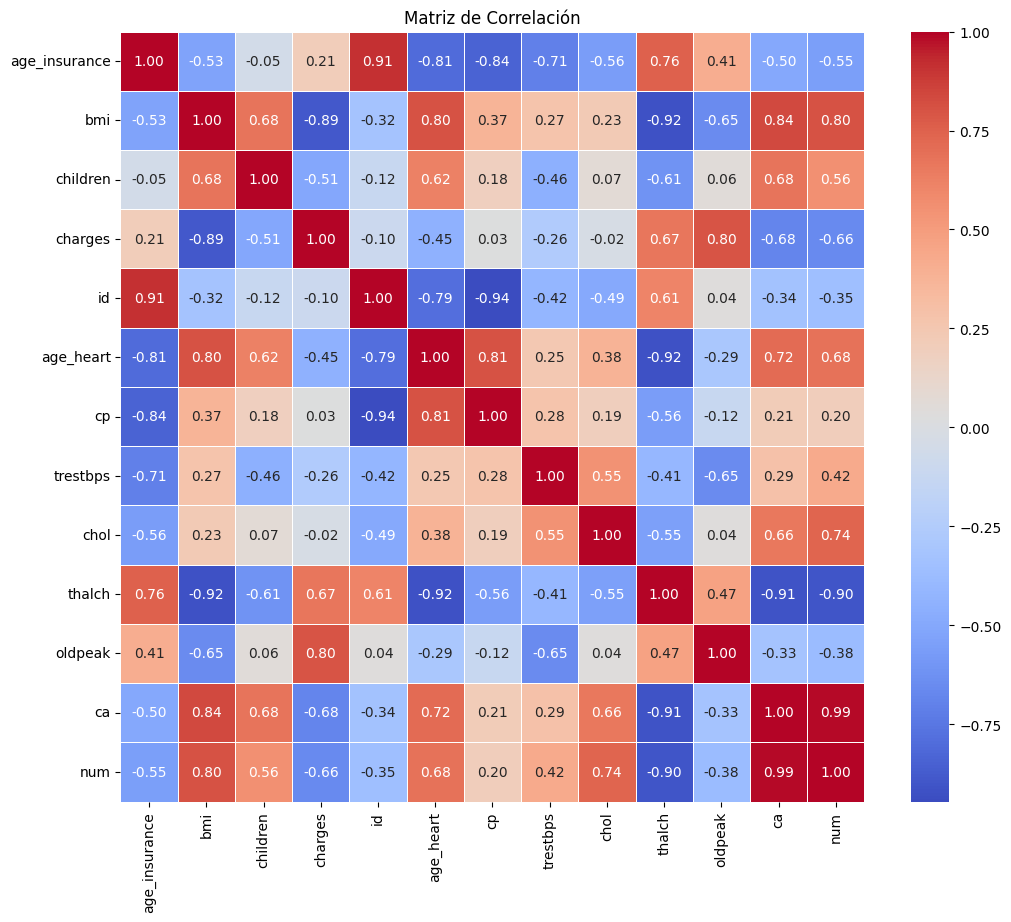

In [120]:
#2 ANALISIS EXPLORATORIO DE DATOS
#Matriz de correlacion
datos_numericos = df_valeria.select_dtypes(include=[np.number])
matriz_correlacion = datos_numericos.corr()
correlacion_costos = matriz_correlacion['charges'].sort_values(ascending=False)

#Matriz de correlación como un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [126]:
#Regresión lineal
X = df_valeria[['age_insurance', 'bmi',]].copy()
y = df_valeria['charges'].copy()

#ENTRENAMIENTO DE DATOS
X_train_VMCP, X_test_VMCP, y_train_VMCP, y_test_VMCP= train_test_split(X, y, test_size=0.4, random_state=42)

print("X_train shape:", X_train_VMCP.shape)
print("X_test shape:", X_test_VMCP.shape)
print("y_train shape:",y_train_VMCP.shape)
print("y_test shape:", y_test_VMCP.shape)

#MODELO DE REGRESIÓN
modelo_Camacho= LinearRegression()

# Entrenar el modelo
modelo_Camacho.fit(X_train_VMCP, y_train_VMCP)
y_pred_VMCP= modelo_Camacho.predict(X_test_VMCP)

# Calcular el R2 Score
r2 = r2_score(y_test_VMCP, y_pred_VMCP)

# Calcular el Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test_VMCP, y_pred_VMCP)
rmse = np.sqrt(mse)

print("\n----------------------------")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

X_train shape: (3, 2)
X_test shape: (2, 2)
y_train shape: (3,)
y_test shape: (2,)

----------------------------
R2 Score: -29.1079
RMSE: 5874.73


**Resultados de la correlación:**

La edad (age) y el índice de masa corporal (bmi) son las variables que muestran la correlación positiva más fuerte con los costos medicos (charges). Esto nos dice que a medida que la edad y el bmi aumentan, los costos médicos tienden a ser más altos

X_train_class shape: (4, 3)
X_test_class shape: (1, 3)
y_train_class shape: (4, 1)
y_test_class shape: (1, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Resultados de Regresión Logística:
              precision    recall  f1-score   support

          63       0.00      0.00      0.00       0.0
          67       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



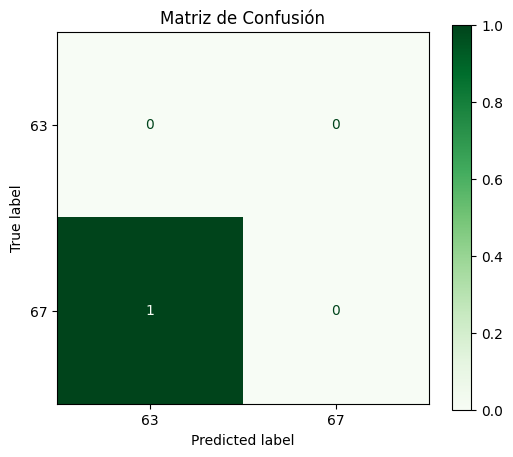

In [139]:
#MODELO DE REGRESIÓN LOGISTICA

# Re-splitting data for classification
X_class = df_valeria[['cp', 'trestbps','restecg']].copy()
X_class = pd.get_dummies(X_class, columns=['restecg'], drop_first=True)
y_class = df_valeria[['age_heart']].copy()

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

print("X_train_class shape:", X_train_class.shape)
print("X_test_class shape:", X_test_class.shape)
print("y_train_class shape:", y_train_class.shape)
print("y_test_class shape:", y_test_class.shape)

#MODELO DE REGRESION LOGISTICA
clasificador_Camacho = LogisticRegression(max_iter=1000)
clasificador_Camacho.fit(X_train_class, y_train_class)
y_pred_Camacho = clasificador_Camacho.predict(X_test_class)

print("\nResultados de Regresión Logística:")
print(classification_report(y_test_class, y_pred_Camacho, zero_division=0))

#MATRIZ DE CONFUSION
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(clasificador_Camacho, X_test_class, y_test_class, cmap='Greens', ax=ax)
ax.set_title('Matriz de Confusión')
plt.show()